# Spatial data Preprocessing

In [31]:
import geopandas as gpd
import shapely
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Seoul road network (3.2s)
roads = gpd.read_file('data/seoul_road/road.shp', crs='epsg:5174')

In [33]:
# 도로종류 : 
# 광로1류 UQS111, 광로2류 UQS112, 광로3류 UQS113, 
# 대로1류 UQS114, 대로2류 UQS115, 대로3류 UQS116, 
# 중로1류 UQS117, 중로2류 UQS118, 중로3류 UQS119 UQS120, 
# 소로2류 UQS121, 소로3류 UQS122, 소로4류 UQS123, 도로시설 기타 UQS190
broads = ['UQS111', 'UQS112', 'UQS113']
mains = ['UQS114', 'UQS115', 'UQS116']
smalls = ['UQS117', 'UQS118', 'UQS119', 'UQS120']

roads_selected = roads[roads.ATRB_SE.isin(broads+mains)]

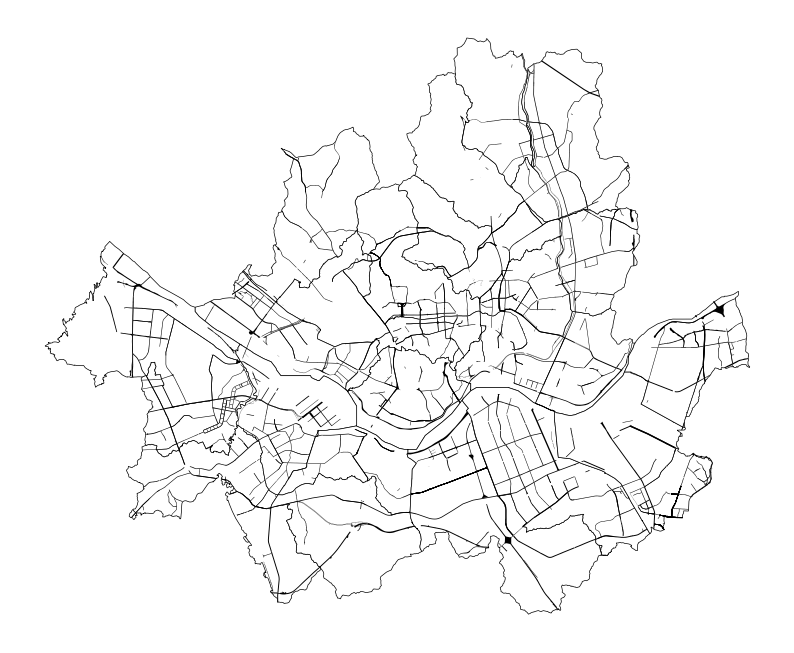

In [34]:
# 서울시 행정구역
fig, ax = plt.subplots(figsize=(10, 10))

seoul = gpd.read_file('data/seoul_geo/seoul.shp')
seoul.to_crs(epsg=5174, inplace=True)
seoul.plot(color='white', edgecolor='black', linewidth=0.5, ax=ax)
roads_selected.plot(ax=ax, color='black', linewidth=0.5)
plt.axis('off')
plt.show()

In [41]:
# 서울시 교통량 전처리 (30s)

traffic = pd.read_excel('data/traffic/2024년 1월 서울시 차량통행속도.xlsx', engine='openpyxl')

In [62]:
traffic

,일자,요일,도로명,링크아이디,시점명,종점명,방향,거리,차선수,기능유형구분,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,20240101,월,4.19로,1080012200,아카데미하우스,국립4.19묘지,상행,1179,1,보조간선도로,...,32.98,32.03,41.78,48.52,30.44,38.27,34.23,44.74,48.07,34.93
1,20240101,월,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1,보조간선도로,...,11.62,11.84,11.04,17.14,12.88,13.55,16.90,13.67,16.33,20.16
2,20240101,월,4.19로,1080012700,국립4.19묘지입구,국립4.19묘지,하행,354,2,보조간선도로,...,15.09,15.99,17.42,18.19,19.96,15.77,18.59,21.07,18.10,22.35
3,20240101,월,4.19로,1080012100,국립4.19묘지,아카데미하우스,하행,1190,2,보조간선도로,...,44.55,45.04,63.66,62.49,48.87,51.45,47.11,50.47,52.23,40.56
4,20240101,월,가락로,1230024700,방이초교,백제고분군,상행,844,1,기타도로,...,18.36,16.54,16.85,17.54,18.63,15.66,18.60,14.43,17.88,19.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157211,20240131,수,흑석로,1190003703,중앙대 정문,중앙대 후문,하행,398,1,기타도로,...,14.21,18.31,20.28,15.76,15.92,17.37,20.52,17.20,16.16,18.23
157212,20240131,수,흑석로,1190003702,중앙대 후문,강남초교앞,하행,143,1,기타도로,...,12.55,13.89,13.47,16.99,17.01,14.35,13.98,15.47,17.05,18.57
157213,20240131,수,흑석로,1190003701,강남초교앞,상도터널,하행,133,1,기타도로,...,17.75,15.85,14.05,16.06,17.02,17.78,17.61,19.86,18.33,17.41
157214,20240131,수,희우정로,1130016400,망원정사거리,한강공원입구,상행,692,2,기타도로,...,21.21,18.01,20.78,19.59,19.14,22.68,22.66,18.15,19.99,21.98


In [45]:
traffic.링크아이디.nunique()

5072

In [57]:
# 링크 데이터

link = pd.read_excel('data/traffic/서울시 서비스링크 보간점 정보_2024년3월 기준.xlsx', engine='openpyxl')
link = gpd.GeoDataFrame(link, geometry=gpd.points_from_xy(link.GRS80TM_X, link.GRS80TM_Y), crs='epsg:5174')

In [81]:
# groupby link id and make the points to a line object
from shapely.geometry import LineString

link_line = link.groupby('LINK_ID').apply(lambda x: LineString(x['geometry'].tolist())).reset_index()
link_line.columns = ['LINK_ID', 'geometry']
link_line = gpd.GeoDataFrame(link_line, crs='epsg:5174')

/var/folders/6r/ndnspf4n6n7_m8rb9bs7qdvr0000gp/T/ipykernel_97750/1057496940.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  link_line = link.groupby('LINK_ID').apply(lambda x: LineString(x['geometry'].tolist())).reset_index()


<Axes: >

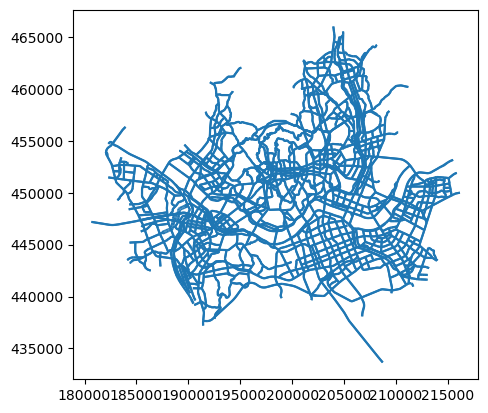

In [83]:
link_line.plot()

In [65]:
link[link.LINK_ID == 1080012200]

,LINK_ID,VER_SEQ,GRS80TM_X,GRS80TM_Y,geometry
12414,1080012200,1,200093.0,460082.0,POINT (200093.000 460082.000)
12415,1080012200,2,200104.0,460094.0,POINT (200104.000 460094.000)
12416,1080012200,3,200127.0,460128.0,POINT (200127.000 460128.000)
12417,1080012200,4,200132.0,460140.0,POINT (200132.000 460140.000)
12418,1080012200,5,200136.0,460164.0,POINT (200136.000 460164.000)
12419,1080012200,6,200140.0,460180.0,POINT (200140.000 460180.000)
12420,1080012200,7,200149.0,460207.0,POINT (200149.000 460207.000)
12421,1080012200,8,200150.0,460222.0,POINT (200150.000 460222.000)
12422,1080012200,9,200152.0,460255.0,POINT (200152.000 460255.000)
12423,1080012200,10,200157.0,460265.0,POINT (200157.000 460265.000)


<Axes: >

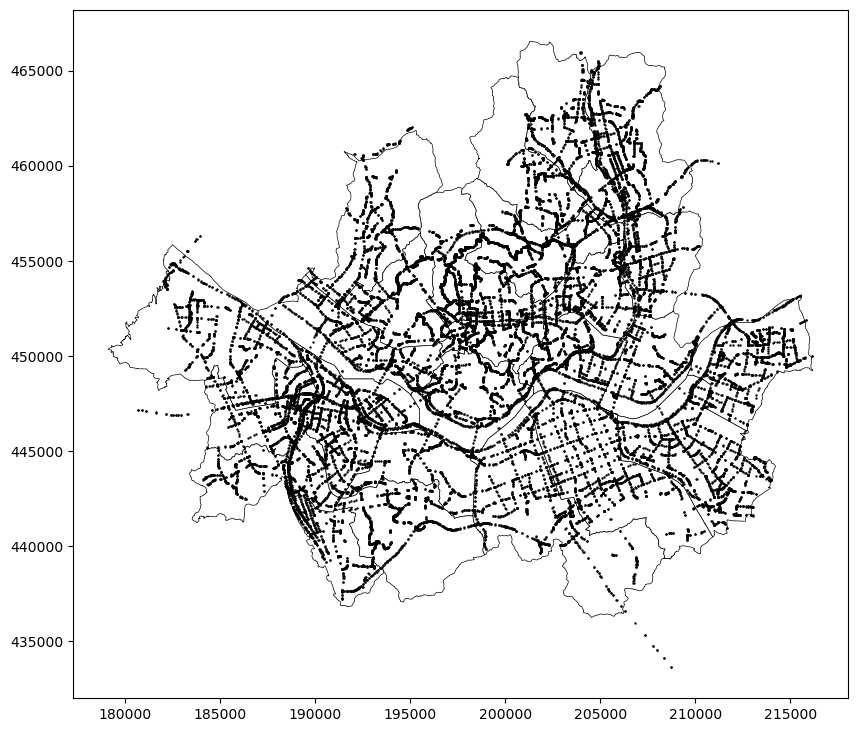

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))

seoul.plot(color='white', edgecolor='black', linewidth=0.5, ax=ax)
link.plot(ax=ax, color='black', markersize=0.5)